# Logistic Regression

Logistic Regression is used as a method of classification, or which category a new data point belongs to.
* convention is to have two classes: 0 and 1

**Sigmoid Function**
Takes in any value and returns an output between 0 and 1

(add plotted function ?)

$$ \phi(z) = \frac{1}{1+e^{-z}} $$

Logistic regression takes liear regression equation and feeds it into the sigmoid function:

$$ p = \frac{1}{1+e^{-(b_{0} + b_{1}x)}} $$

## Terminology
* **True Positive** (TP)
* **False Positive** (FP) - Type I error
* **True Negative** (TN)
* **False Negative** (FN) - Type II error
* **Accuracy** - how often is it correct? (TP + TN)/total observations
* **Misclassification Rate** (Error Rate) - how often is the model wrong? (FP + FN) / total observations

## Example

1. Deal with missing values
2. Deal with categorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


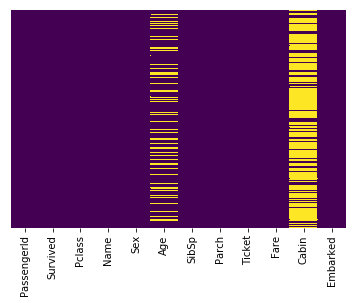

In [4]:
# heatmap of missing data using isnull function
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

`Age` can be dealt with using data from other features, `Cabin` most likely cannot.

In [5]:
# sets defualt style for seaborn charts
sns.set_style('whitegrid')

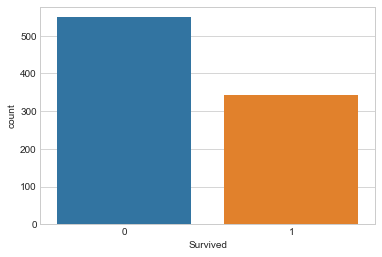

In [6]:
# plot survival
sns.countplot(x='Survived', data=train)

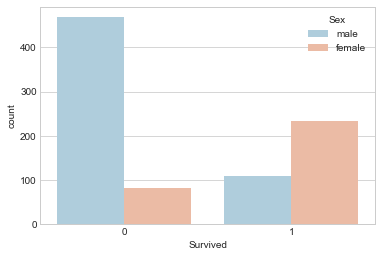

In [8]:
# plot survival by sex
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

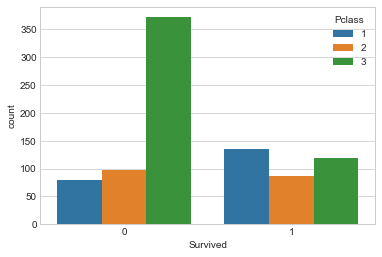

In [9]:
# plot survival by pclass
sns.countplot(x='Survived', data=train, hue='Pclass')

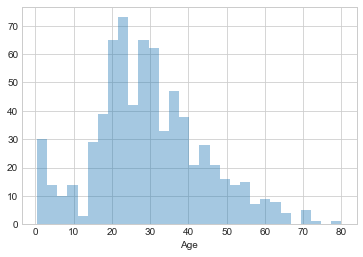

In [10]:
# age distribution
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

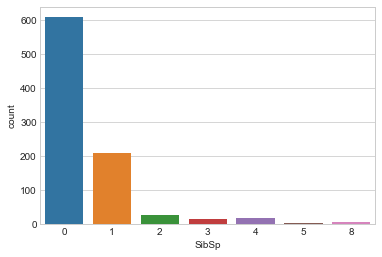

In [11]:
# count of passengers based on the number of siblings on board
sns.countplot(x='SibSp', data=train)

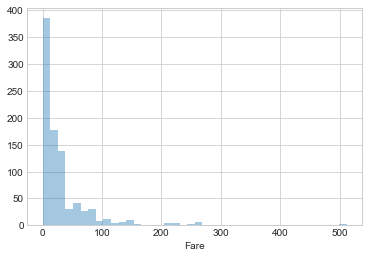

In [14]:
# distribution of fare
sns.distplot(train['Fare'], kde=False, bins=40)

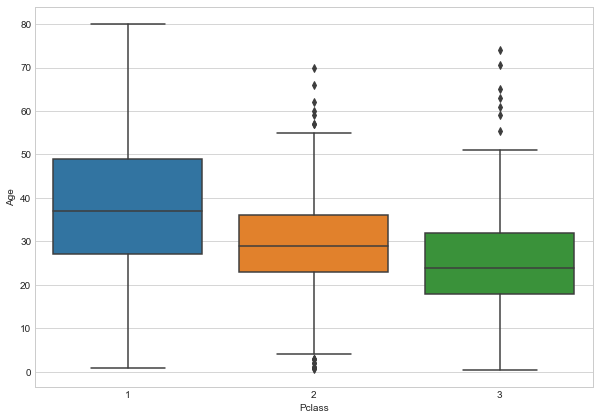

In [17]:
# plot dist of age by class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [20]:
# get median age by pclass
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [21]:
def impute_age(cols):
    ''' imputes aged based on median age of passenger class'''
    
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [22]:
# apply the impute_age function to the age feature
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

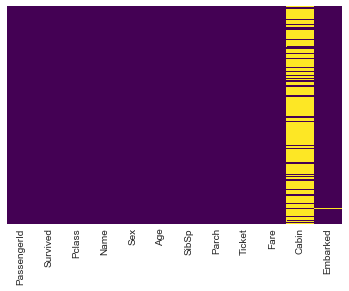

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
# drop cabin column, too many nulls
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train.dropna(inplace=True)

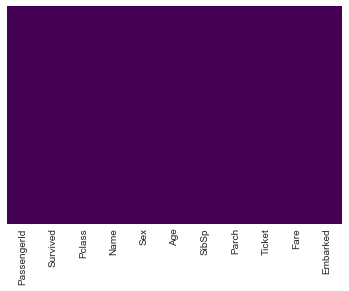

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
# create dummy variables
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


`get_dummies` converts "Male" and "Female" values to 0's and 1's, but the new male and female columns are perfict predictors of one another which introduces **multicolliniarity**. To prevent this, use the `drop_first` argument.

In [29]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [30]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
# create dummy variables for embarked
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [32]:
# add sex and embarked dataframes to train
train = pd.concat([train,sex,embark], axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [35]:
# drop useless columns
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'], axis=1, inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Can use dummy variables on `Pclass` to see the impact on the model

In [37]:
X = train.drop('Survived', axis=1) # drops dependent variable 
y = train['Survived'] # keeps only the dependent variable

In [38]:
from sklearn.cross_validation import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log = LogisticRegression()

In [43]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
predictions = log.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
# displays a classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
# display confusion matrix
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])